In [18]:
import pandas as pd
import numpy as np

from synthesize import SyntheticEmpiricalDataset

In [19]:
metadata = pd.read_csv("../../allen_mouse_brain_atlas_dataset/metadata.csv")
metadata

,sample_name,exp_component_name,platform_label,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,...,injection_method_label,injection_roi_color,injection_roi_id,injection_roi_label,injection_type_color,injection_type_id,injection_type_label,cortical_layer_label,outlier_call,outlier_type
0,ACTGAGTAGGTGACCA-L8TX_180221_01_C11,ACTGAGTAGGTGACCA-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
1,TCAACGACAGACAGGT-L8TX_180221_01_B11,TCAACGACAGACAGGT-1L8TX_180221_01_B11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
2,CTCGTACTCACGACTA-L8TX_180221_01_C11,CTCGTACTCACGACTA-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
3,CACCAGGCAGGTCTCG-L8TX_180221_01_C11,CACCAGGCAGGTCTCG-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
4,GACTGCGCAAAGGTGC-L8TX_180221_01_C11,GACTGCGCAAAGGTGC-2L8TX_180221_01_C11,10x,#5E5765,355.0,355_V3d,#00ADEE,2.0,Glutamatergic,#5E5765,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093031,TTTGTCATCTTTACGT-L8TX_180221_01_E10,TTTGTCATCTTTACGT-2L8TX_180221_01_E10,10x,#04EC5E,179.0,179_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
1093032,TTTGTCATCTTTACGT-L8TX_180221_01_A10,TTTGTCATCTTTACGT-4L8TX_180221_01_A10,10x,#07C6D9,196.0,196_L4/5 IT CTX,#00ADEE,2.0,Glutamatergic,#00E5E5,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
1093033,TTTGTCATCTTTAGGG-L8TX_181012_01_E05,TTTGTCATCTTTAGGG-11L8TX_181012_01_E05,10x,#996068,9.0,9_Lamp5,#F05A28,1.0,GABAergic,#DA808C,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN
1093034,TTTGTCATCTTTAGTC-L8TX_180115_01_E09,TTTGTCATCTTTAGTC-22L8TX_180115_01_E09,10x,#00FFFF,188.0,188_L4/5 IT CTX,#00ADEE,2.0,Glutamatergic,#00E5E5,...,NaN,#FF7373,1,NaN,#FF7373,1,NaN,All,False,NaN


In [20]:
means = pd.read_csv("../../allen_mouse_brain_atlas_dataset/trimmed_means.csv")
medians = pd.read_csv("../../allen_mouse_brain_atlas_dataset/medians.csv")

In [21]:
means

,feature,108_Pvalb,229_L6 IT CTX,67_Sst,6_Lamp5 Lhx6,111_Pvalb,293_CA3,323_L6 CT CTX,17_Pax6,261_L6 Car3,...,190_L4/5 IT CTX,298_CA3,314_NP SUB,340_L6b CTX,139_L2 IT ENTl,210_L5 IT TPE-ENT,370_Endo,257_L5 PPP,273_CA1-ProS,138_L2 IT ENTl
0,Xkr4,9.775850,7.849091,10.150249,9.220,10.064405,8.947619,9.311210,10.252500,7.900000,...,8.57850,9.172284,7.930078,9.624958,8.869418,8.784914,0.000000,8.209695,7.273118,8.823500
1,Gm1992,0.000000,0.000000,0.000000,0.000,0.135898,0.078065,0.000000,0.313115,0.000000,...,0.00000,0.334232,0.000000,0.126433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Gm37381,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Rp1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Sox17,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.990461,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31048,AC168977.1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
31049,AC149090.1,4.219954,7.173148,4.542934,7.972,6.997127,7.141220,7.107702,7.851750,3.891463,...,4.22592,7.496149,7.790364,6.663613,6.913958,7.464549,0.111044,7.251495,7.313517,4.114286
31050,CAAA01118383.1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
31051,Vmn2r122,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
medians

,feature,108_Pvalb,229_L6 IT CTX,67_Sst,6_Lamp5 Lhx6,111_Pvalb,293_CA3,323_L6 CT CTX,17_Pax6,261_L6 Car3,...,190_L4/5 IT CTX,298_CA3,314_NP SUB,340_L6b CTX,139_L2 IT ENTl,210_L5 IT TPE-ENT,370_Endo,257_L5 PPP,273_CA1-ProS,138_L2 IT ENTl
0,Xkr4,9.82,7.840,10.16,9.17,10.08,8.96,9.33,10.300,7.91,...,8.59,9.17,7.96,9.64,8.89,8.80,0.000,8.25,7.31,8.89
1,Gm1992,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00
2,Gm37381,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00
3,Rp1,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00
4,Sox17,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7.635,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31048,AC168977.1,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00
31049,AC149090.1,7.11,7.195,7.40,8.00,7.08,7.21,7.16,7.935,6.26,...,6.80,7.46,7.81,6.69,6.97,7.57,0.000,7.32,7.33,6.64
31050,CAAA01118383.1,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00
31051,Vmn2r122,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00


In [23]:
layer_specific_cell_types = medians.filter(regex=".*L[1-9].*").columns
layer_specific_cell_types

Index(['229_L6 IT CTX', '323_L6 CT CTX', '261_L6 Car3', '199_L4/5 IT CTX',
       '219_L6 IT CTX', '227_L6 IT CTX', '334_L6b/CT ENT', '212_L5 IT TPE-ENT',
       '223_L6 IT CTX', '131_L2 IT RSPv',
       ...
       '201_L4/5 IT TPE-ENT', '226_L6 IT CTX', '256_L5 PT RSP-ACA',
       '126_L2/3 IT APr', '190_L4/5 IT CTX', '340_L6b CTX', '139_L2 IT ENTl',
       '210_L5 IT TPE-ENT', '257_L5 PPP', '138_L2 IT ENTl'],
      dtype='object', length=177)

In [24]:
filtered_metadata = metadata[metadata['cell_type_alias_label'].isin(layer_specific_cell_types)]

In [25]:
cell_type_distribution = filtered_metadata['cell_type_alias_label'].value_counts()

In [26]:
def reformat_cell_type(raw_cell_type):
    unenumerated_cell_type = raw_cell_type.split("_")[-1]
    
    return unenumerated_cell_type

In [27]:
layer_distributions = []
layers = np.sort(np.unique(list(map(lambda cell_type: cell_type.split("_")[-1].split()[0], list(layer_specific_cell_types)))))
print(layers)
for layer in layers:
    is_matching = layer_specific_cell_types.str.contains(f"{layer}\s")
    matching_cell_types = layer_specific_cell_types[is_matching]
    layer_distribution = cell_type_distribution[matching_cell_types]
    layer_distribution = layer_distribution.rename(reformat_cell_type)
    layer_distribution = layer_distribution.groupby(level=0).sum()
    
    print(layer_distribution)

    layer_distributions.append(layer_distribution / layer_distribution.sum())

['L2' 'L2/3' 'L3' 'L4/5' 'L5' 'L5/6' 'L6' 'L6b' 'L6b/CT']
L2 IT ENTl        4068
L2 IT ENTm        2517
L2 IT HATA        1332
L2 IT PAR         1779
L2 IT ProS        1971
L2 IT RSP-ACA     6929
L2 IT RSPv       12327
Name: cell_type_alias_label, dtype: int64
L2/3 IT APr       2848
L2/3 IT CTX     115441
L2/3 IT ENTl      7222
L2/3 IT PPP      18909
L2/3 IT TPE        878
Name: cell_type_alias_label, dtype: int64
L3 IT ENTl     3091
L3 IT ENTm    10698
L3 RSP-ACA     4214
Name: cell_type_alias_label, dtype: int64
L4/5 IT CTX        253289
L4/5 IT TPE-ENT       433
Name: cell_type_alias_label, dtype: int64
L5 IT CTX        44889
L5 IT TPE-ENT     5525
L5 NP CTX        26550
L5 PPP            1240
L5 PT CTX        15832
L5 PT RSP-ACA      951
Name: cell_type_alias_label, dtype: int64
L5/6 IT CTX    10020
Name: cell_type_alias_label, dtype: int64
L6 CT CTX       135241
L6 CT ENTm       14954
L6 Car3          21538
L6 IT CTX        69193
L6 IT ENTl        1169
L6 IT RHP          190
L6 NP

In [28]:
cell_type_name = " ".join(matching_cell_types[0].split()[1:])

In [29]:
layer_distributions[2]

L3 IT ENTl    0.171694
L3 IT ENTm    0.594234
L3 RSP-ACA    0.234072
Name: cell_type_alias_label, dtype: float64

In [30]:
def filter_lowly_expressed_genes(median_gene_expressions, num_genes=2500):
    proportion_nonzero_median = (median_gene_expressions != 0).sum(axis=1) / len(median_gene_expressions.values[0])
    mask = proportion_nonzero_median.nlargest(num_genes)
    filtered_median_gene_expressions = median_gene_expressions.loc[mask.index]
    filtered_gene_names = median_gene_expressions["feature"].loc[mask.index].values
    
    filtered_median_gene_expressions = filtered_median_gene_expressions.rename(columns = reformat_cell_type)
    filtered_median_gene_expressions = filtered_median_gene_expressions.apply(pd.to_numeric, errors='coerce').groupby(level=0, axis=1).mean()
    
    return filtered_median_gene_expressions, filtered_gene_names

In [31]:
class SyntheticAMBACortexDataset(SyntheticEmpiricalDataset):
    """Synthetic mouse brain cortex dataset with ciruclar pattterns.
    
    This class provides methods for initializing a semi-random mouse cortex spatial
    transcriptomics dataset, as well as methods to visualize aspects of the dataset.
    
    Data consists of 4 layers of widths [.35, .15, .25, .25]. Each layer has a
    unique excitatory neuronal type. There are three inhibitory neuronal
    types which have slight layer preferences. There are two layer-specific
    non-neuron types, one of which constitutes most of layer 2. There is a
    third non-neuron type, which is uniformly distributed throughout.
    0 - Excitatory L1
    1 - Excitatory L2
    2 - Excitatory L3
    3 - Excitatory L4
    4 - Inhibitory 1
    5 - Inhibitory 2
    6 - non-Neuron L1
    7 - non-Neuron (ubiquitous)

    Metagenes
    0 - Excitatory
    1 - In
    2 - Inhibitory-1
    3 - Inhibitory-2
    4 - non-Neuron 1
    5 - non-Neuron 2
    6 - L1
    7 - L2
    8 - L3
    9 - L4
    10 - end - random
    """
    
    distributions = layer_distributions
    
    layer_widths = np.array([0.12, 0.04, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]) * 1.35
    layer_endpoints = np.cumsum(layer_widths)
    
    mask_conditions = [
        (lambda coordinates: np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[0]),
#         *[(lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[layer])
#              & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[layer + 1]))
#             for layer in range(0, 7)
#          ],
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[0])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[1])),
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[1])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[2])),
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[2])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[3])),
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[3])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[4])),
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[4])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[5])),
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[5])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[6])),
        (lambda coordinates: (np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[6])
             & (np.linalg.norm(coordinates, axis=1) < SyntheticAMBACortexDataset.layer_endpoints[7])),
        (lambda coordinates: np.linalg.norm(coordinates, axis=1) >= SyntheticAMBACortexDataset.layer_endpoints[7])
    ]
    
    
    def __init__(self, parameters, parent_directory, key=''):
        num_genes = parameters["num_genes"]
        filtered_medians, filtered_gene_names = filter_lowly_expressed_genes(medians, num_genes=num_genes)

        cell_type_definitions = [filtered_medians[layer_distribution.index.values] for layer_distribution in layer_distributions]
        super().__init__(SyntheticAMBACortexDataset.distributions,
                         cell_type_definitions,
                         [filtered_gene_names for _ in layer_distributions],
                         SyntheticAMBACortexDataset.mask_conditions,
                         parameters, parent_directory, key='')
        

In [32]:
for layer_distribution in layer_distributions:
    print(layer_distribution)

L2 IT ENTl       0.131553
L2 IT ENTm       0.081396
L2 IT HATA       0.043075
L2 IT PAR        0.057530
L2 IT ProS       0.063739
L2 IT RSP-ACA    0.224073
L2 IT RSPv       0.398635
Name: cell_type_alias_label, dtype: float64
L2/3 IT APr     0.019601
L2/3 IT CTX     0.794512
L2/3 IT ENTl    0.049705
L2/3 IT PPP     0.130139
L2/3 IT TPE     0.006043
Name: cell_type_alias_label, dtype: float64
L3 IT ENTl    0.171694
L3 IT ENTm    0.594234
L3 RSP-ACA    0.234072
Name: cell_type_alias_label, dtype: float64
L4/5 IT CTX        0.998293
L4/5 IT TPE-ENT    0.001707
Name: cell_type_alias_label, dtype: float64
L5 IT CTX        0.472580
L5 IT TPE-ENT    0.058166
L5 NP CTX        0.279512
L5 PPP           0.013054
L5 PT CTX        0.166675
L5 PT RSP-ACA    0.010012
Name: cell_type_alias_label, dtype: float64
L5/6 IT CTX    1.0
Name: cell_type_alias_label, dtype: float64
L6 CT CTX       0.551750
L6 CT ENTm      0.061009
L6 Car3         0.087870
L6 IT CTX       0.282290
L6 IT ENTl      0.004769
L6 I

In [33]:
##### Create Datasets
parent_directory = "../../data/synthetic_amba_cortex"
parameters_options = [
    {
        'num_cells': 500,
        'num_genes': 100,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 25.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 1000,
        'num_genes': 100,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 25.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 800.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 600.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 1000.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 1200.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 1400.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 1000,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 800.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 1000,
        'num_genes': 1000,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 1600.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 2000.0,
        'lambda_s': 1.0
    },
    {
        'num_cells': 500,
        'num_genes': 500,
        'num_replicates': 4,
        'sigX_scale': 5.0,
        'sigY_scale': 4000.0,
        'lambda_s': 1.0
    },
]

datasets = []
for parameters in parameters_options:
    subdirectory = f'{parent_directory}/{parameters["num_cells"]}_cells_{parameters["num_genes"]}_genes_{parameters["sigY_scale"]}'
    dataset = SyntheticAMBACortexDataset(parameters, subdirectory)
    datasets.append(dataset)
    dataset.save_dataset()

Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.06838447 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06838447 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0.         0.         0.04694347 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.04694347 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.04763437 ... 0.         0.         0.        ]
 [0.         0.04763437 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.04207177]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04207177 0.         ... 0.         0.         0.        ]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02658191 0.         0.        ]
 ...
 [0.         0.         0.02658191 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished
Synthesizing Y and p...
Synthesizing replicate 0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 2
[[0.         0.04052078 0.         ... 0.         0.         0.        ]
 [0.04052078 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Synthesizing replicate 3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/shahula/bin/miniconda3/envs/spicemix/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Finished


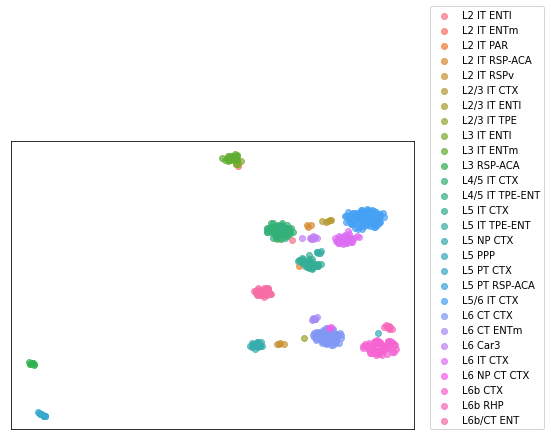

In [ ]:
for dataset in datasets:
    dataset.plot_cells_UMAP(latent_space=False)
    dataset.plot_cells_UMAP(latent_space=True)
    dataset.plot_cell_types()